In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN

from sklearn.metrics.cluster import silhouette_score, adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

In [109]:
penguins = sns.load_dataset("penguins")
penguins = penguins.sample(frac=1).reset_index(drop=True)

In [110]:
# 펭귄의 bill_length_mm., bill_depth_mm, filpper_length_mm, body_mass_g 를 가지고
# 스케일링 후, k-means, mean shift, dbscan으로 군집하자
# k-means는 최적의 k를 찾을 수 있도록 elbow graph 그리고, 실루엣 점수로 그래프 그린 후
# k를 확정하여 학습하자
# 각 모델의 ari, nmi, 실루엣 점수를 출력하자

In [111]:
df = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

In [112]:
type(df)

pandas.core.frame.DataFrame

In [113]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,46.8,16.5,189.0,3650.0
1,43.8,13.9,208.0,4300.0
2,39.5,16.7,178.0,3250.0
3,43.1,19.2,197.0,3500.0
4,41.1,18.2,192.0,4050.0
...,...,...,...,...
339,49.6,15.0,216.0,4750.0
340,39.6,18.1,186.0,4450.0
341,49.2,15.2,221.0,6300.0
342,38.5,17.9,190.0,3325.0


In [114]:
df.isna().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [115]:
df = df.dropna()

In [116]:
# scaling

In [117]:
df.max()

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

In [118]:
df.min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

In [119]:
scaler = StandardScaler()

In [120]:
penguins_df = scaler.fit_transform(df)

In [121]:
penguins_df

array([[ 0.52793167, -0.33022379, -0.84859236, -0.68902013],
       [-0.0223659 , -1.64874645,  0.50457406,  0.12268721],
       [-0.81112573, -0.22879897, -1.63200451, -1.18853234],
       ...,
       [ 0.96816972, -0.98948512,  1.43042477,  2.62024825],
       [-0.99455825,  0.37974995, -0.77737308, -1.0948738 ],
       [-0.68272297,  1.49542297, -0.06518022, -0.28316646]],
      shape=(342, 4))

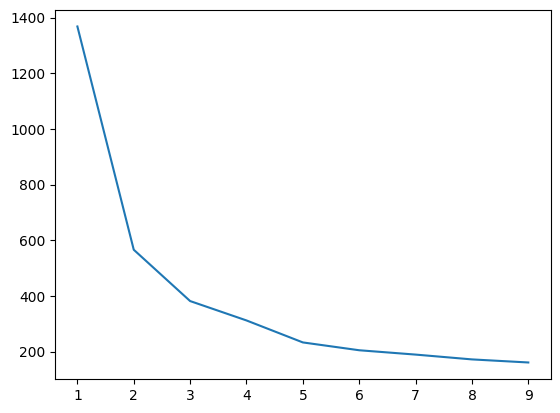

In [122]:
inertia_list = list()

for i in range(1, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(penguins_df)
    inertia_list.append(model.inertia_)

plt.plot(range(1, 10), inertia_list)

In [123]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [124]:
silhouette_score_list = list()

for i in range(2, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(penguins_df)
    silhouette_score_list.append(silhouette_score(penguins_df, model.labels_))

silhouette_score_list

[0.5315403219473028,
 0.45929488821237996,
 0.4239497798264225,
 0.378366947433243,
 0.37185443986362254,
 0.32139222769126197,
 0.284181494426976,
 0.27911431769158906]

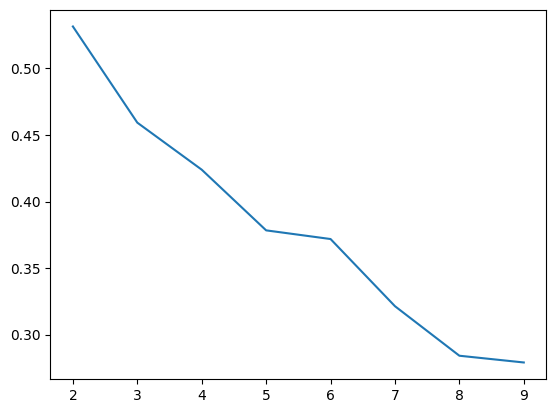

In [125]:
plt.plot(range(2, 10), silhouette_score_list)

In [126]:
k_model = KMeans(n_clusters=2, n_init="auto", random_state=1)

In [127]:
k_model.fit(penguins_df)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [128]:
k_model.labels_

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [129]:
from sklearn.decomposition import PCA

In [130]:
penguins_pca = PCA(n_components=2).fit_transform(penguins_df)

In [131]:
mean_model = MeanShift()

In [132]:
mean_model.fit(penguins_pca)

,bandwidth,None
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


In [133]:
mean_model.labels_

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [134]:
db_model = DBSCAN()

In [135]:
db_model.fit_predict(penguins_df)

array([ 2,  0, -1, -1,  1,  0,  1,  0,  0,  2, -1,  1, -1,  1,  1,  0, -1,
        1,  3,  0,  0, -1,  0,  1, -1,  1,  1,  3,  0,  0,  1,  1, -1,  0,
        1,  3,  3,  0, -1,  0,  1,  1,  3,  1,  1,  1,  0, -1,  1,  1,  0,
        1,  1, -1,  1,  0,  1,  0,  0,  0,  0,  0,  0, -1,  0,  3, -1,  0,
        0,  1,  1,  1,  0,  2, -1,  0,  0,  1,  1,  2,  1,  0, -1,  0, -1,
       -1,  0,  1,  0,  0,  0,  0,  1, -1,  1,  1,  3,  0, -1,  0,  3,  0,
        0,  3,  0,  1,  3,  3, -1,  3,  0, -1,  1,  1,  1, -1,  2, -1,  3,
        0,  1,  1,  0,  0, -1,  1, -1,  1,  1,  1, -1,  0,  2,  0,  0,  0,
        3,  3,  0,  1,  1, -1,  0, -1, -1, -1,  1,  0,  1,  0, -1,  0,  1,
        1,  1,  2,  1, -1,  1, -1, -1,  1,  0,  1,  1,  0,  0,  1,  0,  0,
        1,  1, -1, -1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  2,  0,  0,  1,
        0,  1,  1,  1, -1,  1,  0, -1,  3,  1, -1,  1,  1, -1,  1,  1, -1,
        3,  2,  1,  0,  1,  0,  0,  1, -1,  0, -1,  1,  0, -1, -1,  1,  3,
        1,  1, -1,  1,  0

In [136]:
# 각 모델의 ari, nmi, 실루엣 점수를 출력하자

In [137]:
df_species = penguins["species"].loc[df.index]

In [138]:
df_species

0      Chinstrap
1         Gentoo
2         Adelie
3         Adelie
4         Adelie
         ...    
339       Gentoo
340       Adelie
341       Gentoo
342       Adelie
343       Adelie
Name: species, Length: 342, dtype: object

In [139]:
type(df_species)

pandas.core.series.Series

In [140]:
k_model.labels_

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [141]:
adjusted_rand_score(df_species, k_model.labels_)

0.6550658711307666

In [142]:
normalized_mutual_info_score(df_species, k_model.labels_)

0.7670768187137166

In [144]:
silhouette_score(df, k_model.labels_)

0.5546347299975513

In [145]:
adjusted_rand_score(df_species, mean_model.labels_)

0.6477003791940072

In [146]:
normalized_mutual_info_score(df_species, mean_model.labels_)

0.7117758995883056

In [147]:
silhouette_score(df, mean_model.labels_)

0.5595717283666765

In [148]:
adjusted_rand_score(df_species, db_model.labels_)

0.6632139190592036

In [149]:
normalized_mutual_info_score(df_species, db_model.labels_)

0.663146222185523

In [150]:
silhouette_score(df, db_model.labels_)

-0.08951653884700805